<a href="https://colab.research.google.com/github/ritwiks9635/Unsupervised_Learning_projects/blob/main/Online_Healthcare_Market_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# https://www.kaggle.com/datasets/danofer/india-census ⚕👩‍⚕️👨‍⚕️🥼🚑😷📄📃🏥💉💊🩺

In [ ]:
! unzip /content/https:/www.kaggle.com/datasets/danofer/india-census/india-census.zip

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("india-districts-census-2011.csv")
data.head()

,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
0,1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,282823,156831,1048,...,94,588,71,101,172,74,10,84,15,1119
1,2,JAMMU AND KASHMIR,Badgam,753745,398041,355704,335649,207741,127908,368,...,126,562,72,89,161,96,28,124,18,1066
2,3,JAMMU AND KASHMIR,Leh(Ladakh),133487,78971,54516,93770,62834,30936,488,...,46,122,15,22,37,20,14,34,17,242
3,4,JAMMU AND KASHMIR,Kargil,140802,77785,63017,86236,56301,29935,18,...,27,114,12,18,30,19,3,22,7,214
4,5,JAMMU AND KASHMIR,Punch,476835,251899,224936,261724,163333,98391,556,...,78,346,35,50,85,59,8,67,12,629


In [5]:
data.shape

(640, 118)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Columns: 118 entries, District code to Total_Power_Parity
dtypes: int64(116), object(2)
memory usage: 590.1+ KB


In [7]:
data.describe()

,District code,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,Male_SC,Female_SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
count,640.000000,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,...,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000
mean,320.500000,1.891961e+06,9.738598e+05,9.181011e+05,1.193186e+06,6.793182e+05,5.138675e+05,3.146537e+05,1.617739e+05,1.528798e+05,...,786.046875,1696.456250,294.000000,215.300000,509.300000,194.204688,261.245313,455.450000,279.631250,3315.412500
std,184.896367,1.544380e+06,8.007785e+05,7.449864e+05,1.068583e+06,5.924144e+05,4.801816e+05,3.129818e+05,1.611216e+05,1.520336e+05,...,1038.854733,1720.535151,638.345281,362.684243,968.538748,424.108001,587.279450,1007.364839,1050.934537,4638.568719
min,1.000000,8.004000e+03,4.414000e+03,3.590000e+03,4.436000e+03,2.614000e+03,1.822000e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000
25%,160.750000,8.178610e+05,4.171682e+05,4.017458e+05,4.825982e+05,2.764365e+05,2.008920e+05,8.320850e+04,4.230700e+04,4.267175e+04,...,236.750000,589.000000,59.000000,24.750000,95.000000,19.000000,21.000000,44.000000,18.000000,1024.250000
50%,320.500000,1.557367e+06,7.986815e+05,7.589200e+05,9.573465e+05,5.483525e+05,4.038590e+05,2.460160e+05,1.255485e+05,1.178550e+05,...,518.000000,1220.500000,149.000000,118.500000,278.000000,84.000000,85.500000,186.500000,60.500000,2238.500000
75%,480.250000,2.583551e+06,1.338604e+06,1.264277e+06,1.602260e+06,9.188582e+05,6.641550e+05,4.477078e+05,2.284602e+05,2.140502e+05,...,941.250000,2233.250000,296.500000,262.000000,564.500000,213.250000,293.000000,497.000000,215.500000,3959.000000
max,640.000000,1.106015e+07,5.865078e+06,5.195070e+06,8.227161e+06,4.591396e+06,3.635765e+06,2.464032e+06,1.266504e+06,1.197528e+06,...,10334.000000,13819.000000,10835.000000,3595.000000,14430.000000,5027.000000,7597.000000,12624.000000,18289.000000,60163.000000


In [8]:
data.isnull().sum()

District code                    0
State name                       0
District name                    0
Population                       0
Male                             0
                                ..
Power_Parity_Rs_330000_425000    0
Power_Parity_Rs_425000_545000    0
Power_Parity_Rs_330000_545000    0
Power_Parity_Above_Rs_545000     0
Total_Power_Parity               0
Length: 118, dtype: int64

In [9]:
data.drop(['SC','Male_SC','Female_SC','ST','Male_ST','Female_ST','Male_Workers','Female_Workers','Hindus','Muslims','Christians','Sikhs','Buddhists','Jains','Others_Religions','Religion_Not_Stated','LPG_or_PNG_Households','Households_with_Bicycle','Households_with_Car_Jeep_Van','Households_with_Radio_Transistor','Households_with_Scooter_Motorcycle_Moped','Married_couples_1_Households','Married_couples_2_Households','Married_couples_3_Households','Married_couples_3_or_more_Households','Married_couples_4_Households','Married_couples_5__Households','Married_couples_None_Households','Household_size_1_person_Households','Household_size_2_persons_Households','Household_size_1_to_2_persons','Household_size_3_persons_Households','Household_size_3_to_5_persons_Households','Household_size_4_persons_Households','Household_size_5_persons_Households','Household_size_6_8_persons_Households','Household_size_9_persons_and_above_Households','Location_of_drinking_water_source_Away_Households','Type_of_bathing_facility_Enclosure_without_roof_Households','Type_of_fuel_used_for_cooking_Any_other_Households','Type_of_latrine_facility_Pit_latrine_Households','Type_of_latrine_facility_Other_latrine_Households','Type_of_latrine_facility_Night_soil_disposed_into_open_drain_Households','Type_of_latrine_facility_Flush_pour_flush_latrine_connected_to_other_system_Households','Not_having_bathing_facility_within_the_premises_Total_Households','Not_having_latrine_facility_within_the_premises_Alternative_source_Open_Households','Main_source_of_drinking_water_Un_covered_well_Households','Main_source_of_drinking_water_Handpump_Tubewell_Borewell_Households','Main_source_of_drinking_water_Spring_Households','Main_source_of_drinking_water_River_Canal_Households','Main_source_of_drinking_water_Other_sources_Households','Main_source_of_drinking_water_Other_sources_Spring_River_Canal_Tank_Pond_Lake_Other_sources__Households','Location_of_drinking_water_source_Near_the_premises_Households','Location_of_drinking_water_source_Within_the_premises_Households','Main_source_of_drinking_water_Tank_Pond_Lake_Households','Main_source_of_drinking_water_Tapwater_Households','Main_source_of_drinking_water_Tubewell_Borehole_Households','Condition_of_occupied_census_houses_Dilapidated_Households','Households_with_separate_kitchen_Cooking_inside_house','Having_bathing_facility_Total_Households','Having_latrine_facility_within_the_premises_Total_Households','Ownership_Owned_Households','Ownership_Rented_Households','Households_with_Telephone_Mobile_Phone_Landline_only','Households_with_Telephone_Mobile_Phone_Mobile_only','Households_with_TV_Computer_Laptop_Telephone_mobile_phone_and_Scooter_Car','Households_with_Television','Households_with_Telephone_Mobile_Phone','Households_with_Telephone_Mobile_Phone_Both'
                        ,'Housholds_with_Electric_Lighting'], axis=1, inplace= True)

In [10]:
data.head()

,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,Workers,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
0,1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,282823,156831,229064,...,94,588,71,101,172,74,10,84,15,1119
1,2,JAMMU AND KASHMIR,Badgam,753745,398041,355704,335649,207741,127908,214866,...,126,562,72,89,161,96,28,124,18,1066
2,3,JAMMU AND KASHMIR,Leh(Ladakh),133487,78971,54516,93770,62834,30936,75079,...,46,122,15,22,37,20,14,34,17,242
3,4,JAMMU AND KASHMIR,Kargil,140802,77785,63017,86236,56301,29935,51873,...,27,114,12,18,30,19,3,22,7,214
4,5,JAMMU AND KASHMIR,Punch,476835,251899,224936,261724,163333,98391,161393,...,78,346,35,50,85,59,8,67,12,629


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 48 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   District code                    640 non-null    int64 
 1   State name                       640 non-null    object
 2   District name                    640 non-null    object
 3   Population                       640 non-null    int64 
 4   Male                             640 non-null    int64 
 5   Female                           640 non-null    int64 
 6   Literate                         640 non-null    int64 
 7   Male_Literate                    640 non-null    int64 
 8   Female_Literate                  640 non-null    int64 
 9   Workers                          640 non-null    int64 
 10  Main_Workers                     640 non-null    int64 
 11  Marginal_Workers                 640 non-null    int64 
 12  Non_Workers                      640

In [12]:
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

In [41]:
fig = px.histogram(data,
                   x="State name",
                   y = "Population",
                   title='Population Vs States')
fig.update_layout(bargap=0.3)
fig.show()

In [42]:
fig = px.histogram(data,
                   x="State name",
                   y = "Literate",
                   title='Literate Population in State')
fig.update_layout(bargap=0.3)
fig.show()

In [43]:
fig = px.histogram(data,
                   x="State name",
                   y = "Households_with_Internet",
                   title='Household with internet')
fig.update_layout(bargap=0.1)
fig.show()

In [16]:
NCT_of_Delhi = data[data['State name'] == "NCT OF DELHI"]
Uttar_Pradesh = data[data['State name'] == "UTTAR PRADESH"]
West_Bengal = data[data['State name'] == "WEST BENGAL"]
Gujarat = data[data['State name'] == "GUJARAT"]
Maharashtra = data[data['State name'] == "MAHARASHTRA"]
Andra_Pradesh = data[data['State name'] == "ANDRA PRADESH"]
Karnataka = data[data['State name'] == "KARNATAKA"]
Kerala = data[data['State name'] == "KERALA"]
Tamil_Nadu = data[data['State name'] == "TAMIL NADU"]

In [17]:
def explore_state(state):
    fig = px.histogram(state,
                       marginal = 'box',
                       x="District name",
                       y = "Population",
                       title='Population Vs Districts')
    fig.update_layout(bargap=0.1)
    fig.show()

    fig = px.histogram(state,
                       marginal = 'box',
                       x="District name",
                       y = "Literate",
                       title='Number of Literate Vs Districts')
    fig.update_layout(bargap=0.1)
    fig.show()

    fig = px.histogram(state,
                      marginal = 'box',
                      x = "District name",
                      y = "Households_with_Internet",
                      title = "Households with Internet in every District")
    fig.show()

In [44]:
explore_state(West_Bengal)

In [19]:
explore_state(Uttar_Pradesh)

In [45]:
explore_state(Karnataka)

In [46]:
explore_state(Tamil_Nadu)

In [47]:
explore_state(Maharashtra)

In [49]:
new_state = pd.concat([Uttar_Pradesh, Maharashtra, Tamil_Nadu, Karnataka], axis=0)

In [50]:
new_state.head()

,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,Workers,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
131,132,UTTAR PRADESH,Saharanpur,3466382,1834106,1632276,2077108,1220114,856994,1037344,...,974,2349,251,332,583,223,138,361,125,4029
132,133,UTTAR PRADESH,Muzaffarnagar,4143512,2193434,1950078,2417339,1448528,968811,1291644,...,1114,2813,316,416,732,234,173,407,149,4871
133,134,UTTAR PRADESH,Bijnor,3682713,1921215,1761498,2135393,1241471,893922,1088036,...,930,2481,289,381,670,187,142,329,109,4310
134,135,UTTAR PRADESH,Moradabad,4772006,2503186,2268820,2263848,1357435,906413,1417811,...,1250,3125,357,464,821,253,226,479,198,5452
135,136,UTTAR PRADESH,Rampur,2335819,1223889,1111930,1043666,630408,413258,737261,...,474,1439,186,239,425,82,92,174,48,2545


In [51]:
new_state[new_state["Literate"] > 8000000]

,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,Workers,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
516,517,MAHARASHTRA,Thane,11060148,5865078,5195070,8227161,4591396,3635765,4492767,...,8527,13483,2404,3097,5501,4199,5195,9394,5565,35118


In [52]:
fig = px.treemap(new_state,
                 path=['State name','District name'],
                 values='Population',
                 color='Households_with_Internet',
                 color_continuous_scale='RdBu',
                title = 'Finding out best Market')
fig.update_layout(bargap=1,autosize=False,
    width=600,
    height=600,)
fig.show()

fig = px.sunburst(new_state,
                 path=['State name','District name'],
                 values='Population',
                 color='Households_with_Internet',
                 color_continuous_scale='RdBu',
                title = 'Finding out best Market')
fig.update_layout(
    autosize=False,
    width=600,
    height=600)
fig.show()

In [53]:
new_state.drop(['Power_Parity_Less_than_Rs_45000','Power_Parity_Rs_45000_90000','Power_Parity_Rs_90000_150000','Power_Parity_Rs_45000_150000','Power_Parity_Rs_150000_240000','Power_Parity_Rs_240000_330000','Power_Parity_Rs_150000_330000','Power_Parity_Rs_330000_425000','Power_Parity_Rs_425000_545000','Power_Parity_Rs_330000_545000','Power_Parity_Above_Rs_545000','Total_Power_Parity','Male_Literate','Female_Literate','Workers','Main_Workers','Marginal_Workers','Non_Workers','Cultivator_Workers','Agricultural_Workers','Household_Workers','Other_Workers','Below_Primary_Education','Primary_Education','Middle_Education','Secondary_Education','Higher_Education','Graduate_Education','Other_Education','Literate_Education','Illiterate_Education','Total_Education'], axis=1, inplace= True)

In [54]:
new_state.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 131 to 583
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   District code             168 non-null    int64 
 1   State name                168 non-null    object
 2   District name             168 non-null    object
 3   Population                168 non-null    int64 
 4   Male                      168 non-null    int64 
 5   Female                    168 non-null    int64 
 6   Literate                  168 non-null    int64 
 7   Households_with_Internet  168 non-null    int64 
 8   Households_with_Computer  168 non-null    int64 
 9   Rural_Households          168 non-null    int64 
 10  Urban_Households          168 non-null    int64 
 11  Households                168 non-null    int64 
 12  Age_Group_0_29            168 non-null    int64 
 13  Age_Group_30_49           168 non-null    int64 
 14  Age_Group_50            

In [55]:
from sklearn.preprocessing import LabelEncoder

In [56]:
l_e = LabelEncoder()

In [57]:
new_state['State name'] = l_e.fit_transform(new_state['State name'])
new_state['District name'] = l_e.fit_transform(new_state['District name'])

In [58]:
new_state.head()

,District code,State name,District name,Population,Male,Female,Literate,Households_with_Internet,Households_with_Computer,Rural_Households,Urban_Households,Households,Age_Group_0_29,Age_Group_30_49,Age_Group_50,Age not stated
131,132,3,129,3466382,1834106,1632276,2077108,9699,38816,605082,284156,889238,2228689,769736,433862,34095
132,133,3,107,4143512,2193434,1950078,2417339,10077,56149,673746,296104,969850,2671757,911621,544283,15851
133,134,3,28,3682713,1921215,1761498,2135393,7303,37341,683875,224648,908523,2404576,786305,450186,41646
134,135,3,104,4772006,2503186,2268820,2263848,11690,61846,692398,355518,1047916,3168270,988486,525574,89676
135,136,3,127,2335819,1223889,1111930,1043666,3847,25960,396775,143217,539992,1576123,491164,258913,9619


Text(0.5, 1.0, 'correlation of new data')

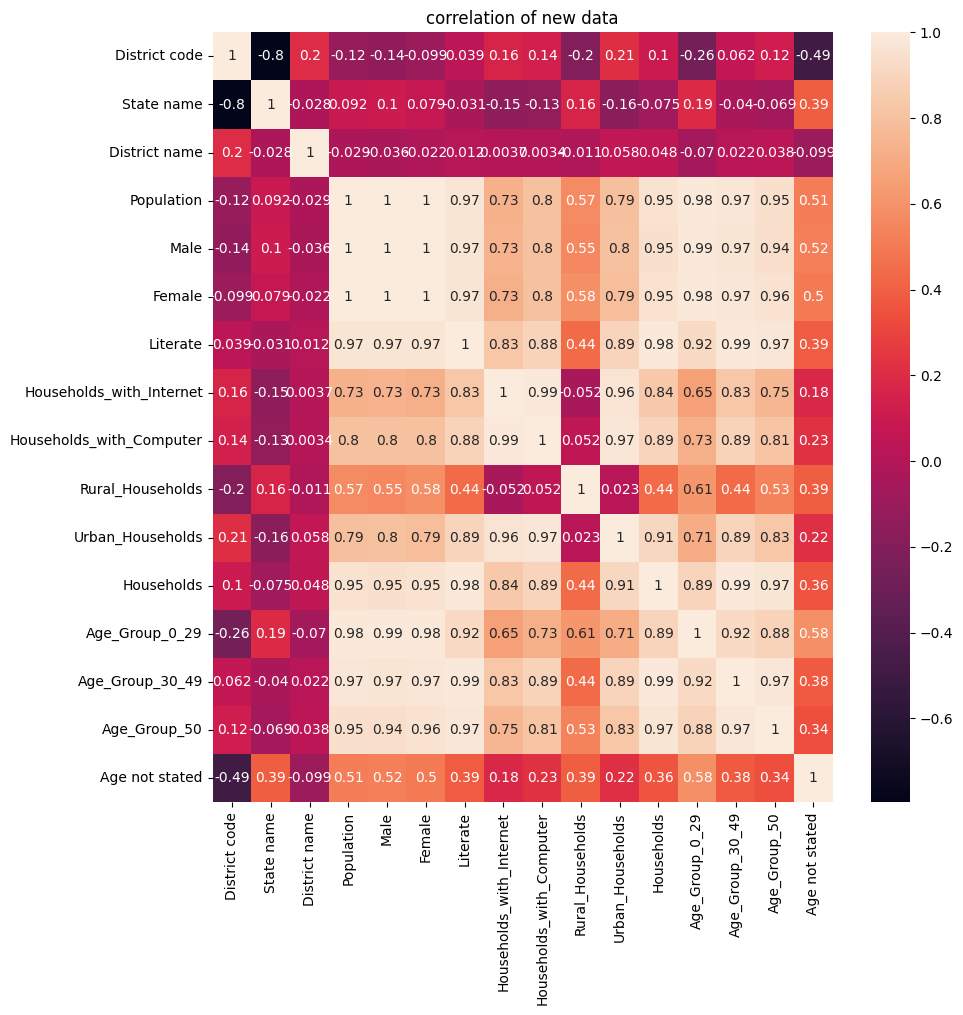

In [59]:
plt.figure(figsize=(10,10))
sns.heatmap(new_state.corr(), annot = True)
plt.title("correlation of new data")

In [60]:
new_state.columns

Index(['District code', 'State name', 'District name', 'Population', 'Male',
       'Female', 'Literate', 'Households_with_Internet',
       'Households_with_Computer', 'Rural_Households', 'Urban_Households',
       'Households', 'Age_Group_0_29', 'Age_Group_30_49', 'Age_Group_50',
       'Age not stated'],
      dtype='object')

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
sc = StandardScaler()

In [63]:
scaler = sc.fit_transform(new_state)

In [64]:
scaler_data = pd.DataFrame(scaler, columns = new_state.columns)

In [65]:
scaler_data.head()

,District code,State name,District name,Population,Male,Female,Literate,Households_with_Internet,Households_with_Computer,Rural_Households,Urban_Households,Households,Age_Group_0_29,Age_Group_30_49,Age_Group_50,Age not stated
0,-1.324692,0.992915,0.938211,0.504293,0.547092,0.455580,0.300132,-0.189428,-0.177665,0.761676,0.035085,0.352473,0.734211,0.219546,0.012682,1.132291
1,-1.319693,0.992915,0.484570,0.923266,0.968877,0.870508,0.583607,-0.182633,-0.003254,1.088909,0.061826,0.514374,1.204868,0.533253,0.449547,0.164387
2,-1.314694,0.992915,-1.144411,0.638147,0.649342,0.624294,0.348694,-0.232497,-0.192507,1.137181,-0.098101,0.391205,0.921050,0.256180,0.077265,1.532896
3,-1.309694,0.992915,0.422710,1.312147,1.332468,1.286663,0.455720,-0.153639,0.054071,1.177799,0.194800,0.671162,1.732297,0.703201,0.375527,4.081044
4,-1.304695,0.992915,0.896971,-0.195243,-0.169189,-0.223794,-0.560915,-0.294619,-0.307027,-0.231057,-0.280352,-0.348951,0.041012,-0.396375,-0.679479,-0.166240


In [66]:
scaler_data.max()

District code               1.179951
State name                  0.992915
District name               1.721771
Population                  5.202932
Male                        5.278704
Female                      5.107227
Literate                    5.424253
Households_with_Internet    7.381445
Households_with_Computer    7.382053
Rural_Households            3.433510
Urban_Households            6.289856
Households                  5.833210
Age_Group_0_29              4.936360
Age_Group_30_49             5.685461
Age_Group_50                4.571477
Age not stated              4.137599
dtype: float64

In [67]:
X1 = scaler_data.loc[:, ["Population","Literate"]].values

In [68]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

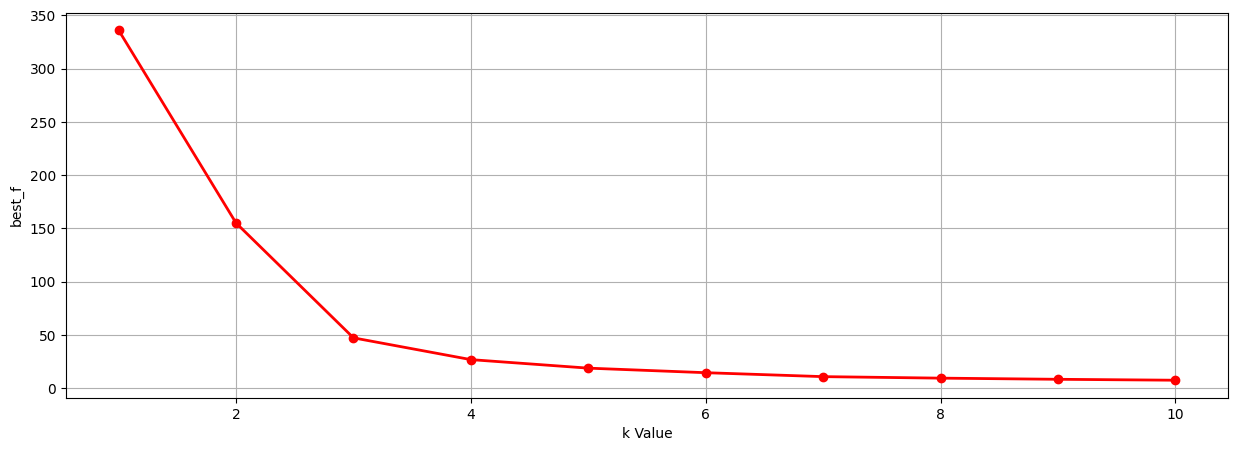

In [75]:
best_f = []
for j in range(1,11):
  kmeans = KMeans(n_clusters = j, init = "k-means++")
  kmeans.fit(X1)
  best_f.append(kmeans.inertia_)

plt.figure(figsize=(15,5))
plt.grid()
plt.plot(range(1,11), best_f, linewidth=2, color='red', marker="o")
plt.xlabel('k Value')
plt.ylabel('best_f')

plt.show()

In [76]:
kmeans = KMeans(n_clusters= 3)
label = kmeans.fit_predict(X1)
print(label)

[1 1 1 1 0 0 1 0 1 0 1 1 0 0 1 0 0 1 1 0 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 2 2 1 1 2 1 0 0 0 1 1 0 0 1 1 1 1 1 1 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



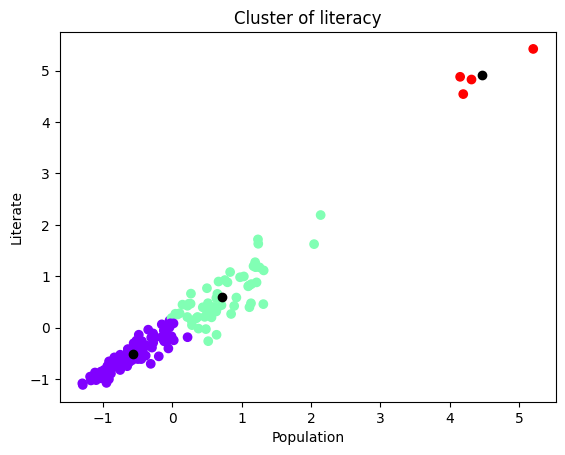

In [77]:
plt.scatter(X1[:,0], X1[:,1], c=kmeans.labels_,cmap= 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title('Cluster of literacy')
plt.xlabel('Population')
plt.ylabel('Literate')
plt.show()

In [78]:
X2 = scaler_data.loc[:, ["Households_with_Internet","Literate"]].values

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

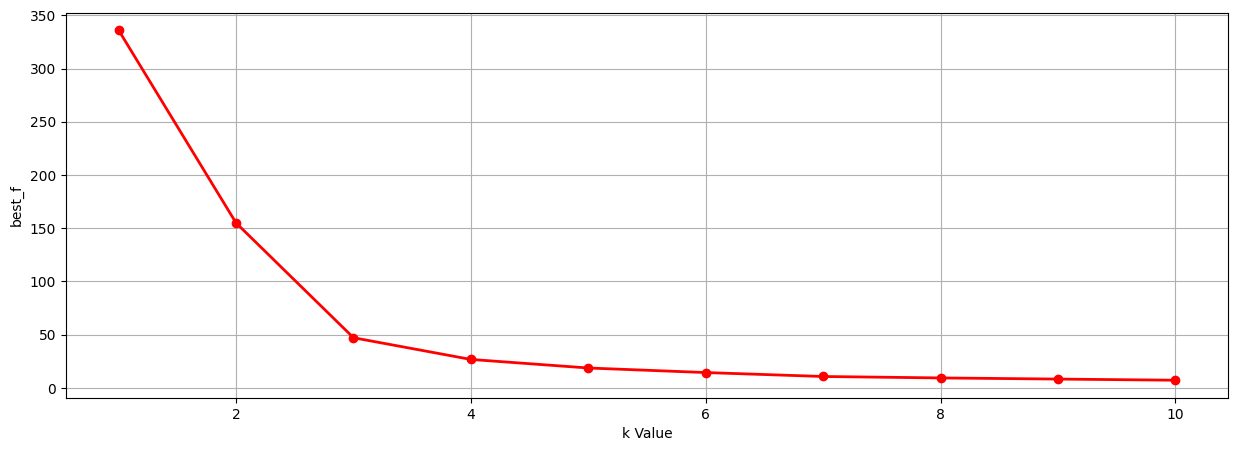

In [79]:
best_f = []
for j in range(1, 11):
    kmeans = KMeans(n_clusters=j, init='k-means++')
    kmeans.fit(X1)
    best_f.append(kmeans.inertia_)
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(range(1,11), best_f, linewidth=2, color='red', marker="o")
plt.xlabel('k Value')
plt.ylabel('best_f')

plt.show()

In [81]:
kmeans = KMeans(n_clusters= 3)
label = kmeans.fit_predict(X2)
print(label)

[0 0 0 0 2 2 0 2 0 2 0 0 2 2 0 2 2 2 0 2 2 0 0 0 2 0 0 2 2 2 2 2 0 2 2 2 2
 2 2 2 2 0 2 0 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 2 0 0 0 2 0 2 2 2 2 2 2 2 0
 0 2 2 0 2 0 2 2 2 2 0 0 2 2 2 0 0 1 1 0 0 1 0 2 2 2 0 0 2 2 0 0 0 1 0 0 2
 0 0 2 2 2 2 2 0 2 2 0 2 2 0 2 2 0 2 2 2 2 0 2 2 2 0 0 0 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 0 1 2 2 2 2 0 2 2 2 2 2 2 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



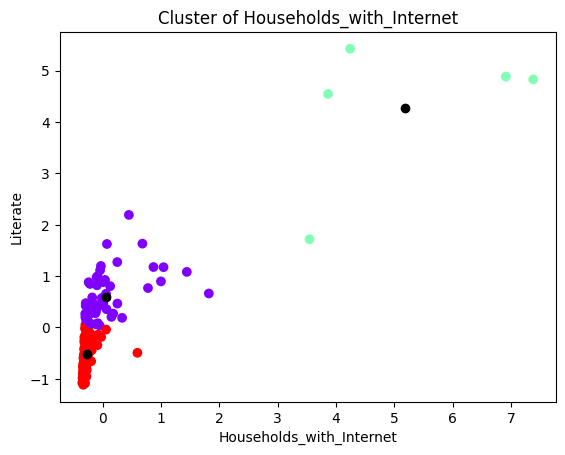

In [82]:
plt.scatter(X2[:,0], X2[:,1], c=kmeans.labels_,cmap= 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title('Cluster of Households_with_Internet')
plt.xlabel('Households_with_Internet')
plt.ylabel('Literate')
plt.show()

In [83]:
X3 = scaler_data.loc[:, ["Urban_Households","Households_with_Computer"]].values

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

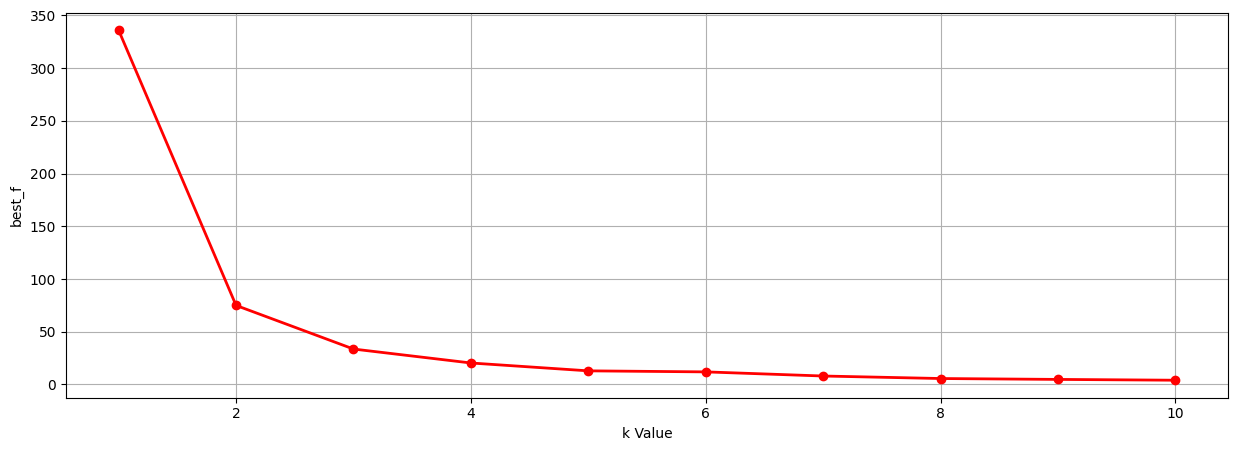

In [84]:
best_f = []
for j in range(1, 11):
    kmeans = KMeans(n_clusters=j, init='k-means++')
    kmeans.fit(X3)
    best_f.append(kmeans.inertia_)
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(range(1,11), best_f, linewidth=2, color='red', marker="o")
plt.xlabel('k Value')
plt.ylabel('best_f')

plt.show()

In [86]:
kmeans = KMeans(n_clusters= 2)
label = kmeans.fit_predict(X3)
print(label)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



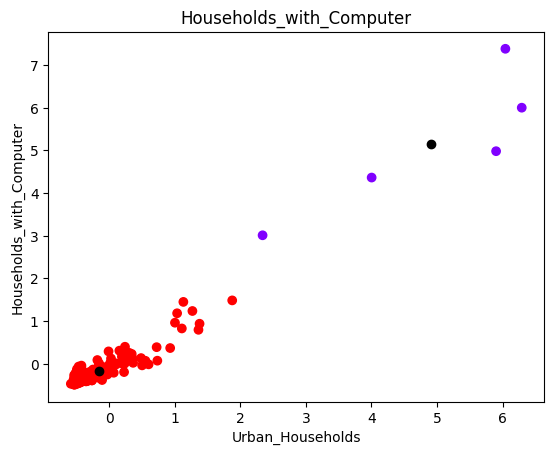

In [87]:
plt.scatter(X3[:,0], X3[:,1], c=kmeans.labels_,cmap= 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title('Households_with_Computer')
plt.xlabel('Urban_Households')
plt.ylabel('Households_with_Computer')
plt.show()

In [88]:
X4 = scaler_data.loc[:, ["Age_Group_0_29","Literate"]].values

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

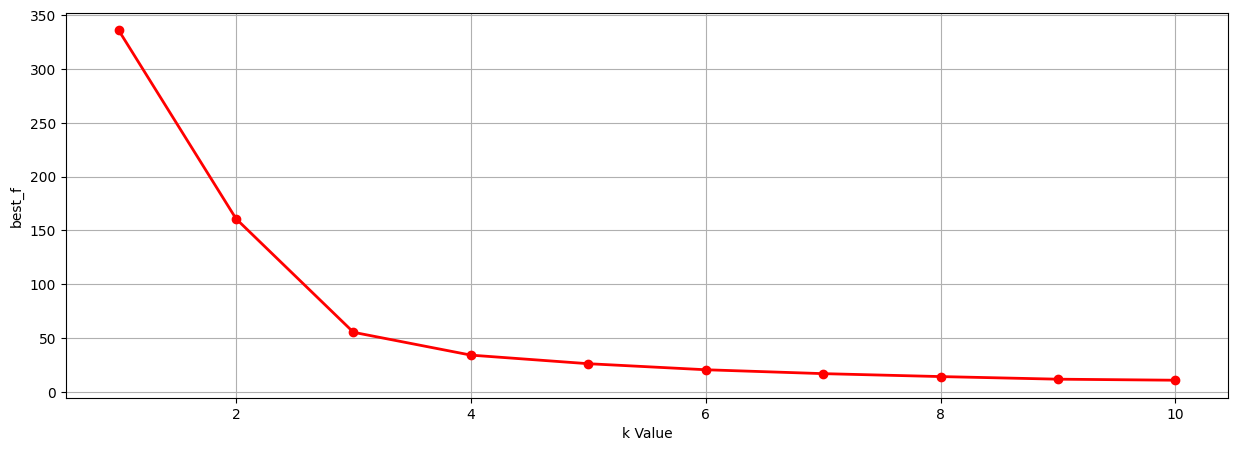

In [89]:
best_f = []
for j in range(1, 11):
    kmeans = KMeans(n_clusters=j, init='k-means++')
    kmeans.fit(X4)
    best_f.append(kmeans.inertia_)
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(range(1,11), best_f, linewidth=2, color='red', marker="o")
plt.xlabel('k Value')
plt.ylabel('best_f')

plt.show()

In [92]:
kmeans = KMeans(n_clusters= 4)
label = kmeans.fit_predict(X4)
print(label)

[3 0 0 0 3 1 3 1 0 1 3 0 1 3 0 3 1 3 0 1 3 0 0 0 3 0 3 1 1 1 1 1 0 1 1 1 1
 1 1 1 3 3 1 0 3 3 3 0 3 1 1 3 3 3 1 3 0 3 3 0 3 3 0 0 1 0 1 3 1 1 1 1 1 0
 3 1 1 3 1 0 1 1 1 1 3 3 1 1 1 0 0 2 2 3 3 2 0 3 3 1 0 3 1 1 0 3 0 0 0 0 3
 3 3 1 1 1 1 1 3 1 1 3 1 1 3 1 1 3 1 1 1 1 3 1 1 1 3 3 0 1 1 1 1 1 1 1 1 1
 3 1 1 1 1 1 3 2 1 1 1 1 3 1 3 1 1 1 1 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



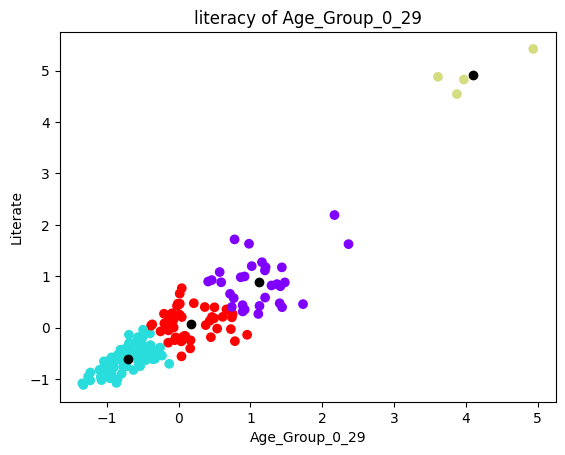

In [93]:
plt.scatter(X4[:,0], X4[:,1], c=kmeans.labels_,cmap= 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title('literacy of Age_Group_0_29')
plt.xlabel('Age_Group_0_29')
plt.ylabel('Literate')
plt.show()

In [94]:
x = new_state[['District code',   'State name', 'District name', 'Population', 'Male', 'Female', 'Literate',
          'Households_with_Internet', 'Households_with_Computer', 'Rural_Households', 'Urban_Households',
          'Households', 'Age_Group_0_29', 'Age_Group_30_49',    'Age_Group_50']].values
kmeans = KMeans(n_clusters = 15, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(x)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [95]:
scaler_data["labels"] = labels

In [96]:
scaler_data.head()

,District code,State name,District name,Population,Male,Female,Literate,Households_with_Internet,Households_with_Computer,Rural_Households,Urban_Households,Households,Age_Group_0_29,Age_Group_30_49,Age_Group_50,Age not stated,labels
0,-1.324692,0.992915,0.938211,0.504293,0.547092,0.455580,0.300132,-0.189428,-0.177665,0.761676,0.035085,0.352473,0.734211,0.219546,0.012682,1.132291,5
1,-1.319693,0.992915,0.484570,0.923266,0.968877,0.870508,0.583607,-0.182633,-0.003254,1.088909,0.061826,0.514374,1.204868,0.533253,0.449547,0.164387,13
2,-1.314694,0.992915,-1.144411,0.638147,0.649342,0.624294,0.348694,-0.232497,-0.192507,1.137181,-0.098101,0.391205,0.921050,0.256180,0.077265,1.532896,5
3,-1.309694,0.992915,0.422710,1.312147,1.332468,1.286663,0.455720,-0.153639,0.054071,1.177799,0.194800,0.671162,1.732297,0.703201,0.375527,4.081044,13
4,-1.304695,0.992915,0.896971,-0.195243,-0.169189,-0.223794,-0.560915,-0.294619,-0.307027,-0.231057,-0.280352,-0.348951,0.041012,-0.396375,-0.679479,-0.166240,3


In [107]:
trace1 = go.Scatter3d(
    x= scaler_data['Population'],
    y= scaler_data['State name'],
    z= scaler_data['District name'],
    mode='markers',
     marker=dict(
        color = scaler_data['labels'],
        size= 10,
        line=dict(
            color= scaler_data['labels'],
            width= 12
        ),
        opacity=0.8
     )
)
df = [trace1]

layout = go.Layout(
    title = 'population in States as well as District',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    scene = dict(
            xaxis = dict(title  = 'Population'),
            yaxis = dict(title  = 'State name'),
            zaxis = dict(title  = 'District name')
        )
)

fig = go.Figure(data = df, layout = layout)
iplot(fig)

In [100]:
trace1 = go.Scatter3d(
    x= scaler_data['Households'],
    y= scaler_data['Rural_Households'],
    z= scaler_data['Urban_Households'],
    mode='markers',
     marker=dict(
        color = scaler_data['labels'],
        size= 10,
        line=dict(
            color= scaler_data['labels'],
            width= 12
        ),
        opacity=0.8
     )
)
df = [trace1]

layout = go.Layout(
    title = 'Households in rural and urban',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    scene = dict(
            xaxis = dict(title  = 'Households'),
            yaxis = dict(title  = 'Rural_Households'),
            zaxis = dict(title  = 'Urban_Households')
        )
)

fig = go.Figure(data = df, layout = layout)
iplot(fig)

In [99]:
trace1 = go.Scatter3d(
    x= scaler_data['State name'],
    y= scaler_data['Rural_Households'],
    z= scaler_data['Urban_Households'],
    mode='markers',
     marker=dict(
        color = scaler_data['labels'],
        size= 10,
        line=dict(
            color= scaler_data['labels'],
            width= 12
        ),
        opacity=0.8
     )
)
df = [trace1]

layout = go.Layout(
    title = 'households in States',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    scene = dict(
            xaxis = dict(title  = 'State name'),
            yaxis = dict(title  = 'Rural_Households'),
            zaxis = dict(title  = 'Urban_Households')
        )
)

fig = go.Figure(data = df, layout = layout)
iplot(fig)

In [101]:
trace1 = go.Scatter3d(
    x= scaler_data['Age_Group_0_29'],
    y= scaler_data['Rural_Households'],
    z= scaler_data['Urban_Households'],
    mode='markers',
     marker=dict(
        color = scaler_data['labels'],
        size= 10,
        line=dict(
            color= scaler_data['labels'],
            width= 12
        ),
        opacity=0.8
     )
)
df = [trace1]

layout = go.Layout(
    title = 'households of 0-29 age group',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    scene = dict(
            xaxis = dict(title  = 'Age_Group_0_29'),
            yaxis = dict(title  = 'Rural_Households'),
            zaxis = dict(title  = 'Urban_Households')
        )
)

fig = go.Figure(data = df, layout = layout)
iplot(fig)

In [102]:
trace1 = go.Scatter3d(
    x= scaler_data['Age_Group_30_49'],
    y= scaler_data['Rural_Households'],
    z= scaler_data['Urban_Households'],
    mode='markers',
     marker=dict(
        color = scaler_data['labels'],
        size= 10,
        line=dict(
            color= scaler_data['labels'],
            width= 12
        ),
        opacity=0.8
     )
)
df = [trace1]

layout = go.Layout(
    title = 'households of 30_49 age group',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    scene = dict(
            xaxis = dict(title  = 'Age_Group_30_49'),
            yaxis = dict(title  = 'Rural_Households'),
            zaxis = dict(title  = 'Urban_Households')
        )
)

fig = go.Figure(data = df, layout = layout)
iplot(fig)

In [103]:
trace1 = go.Scatter3d(
    x= scaler_data['Age_Group_50'],
    y= scaler_data['Rural_Households'],
    z= scaler_data['Urban_Households'],
    mode='markers',
     marker=dict(
        color = scaler_data['labels'],
        size= 10,
        line=dict(
            color= scaler_data['labels'],
            width= 12
        ),
        opacity=0.8
     )
)
df = [trace1]

layout = go.Layout(
    title = 'households of 50 age group',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    scene = dict(
            xaxis = dict(title  = 'Age_Group_50'),
            yaxis = dict(title  = 'Rural_Households'),
            zaxis = dict(title  = 'Urban_Households')
        )
)

fig = go.Figure(data = df, layout = layout)
iplot(fig)

In [104]:
trace1 = go.Scatter3d(
    x= scaler_data['Age_Group_0_29'],
    y= scaler_data['State name'],
    z= scaler_data['Population'],
    mode='markers',
     marker=dict(
        color = scaler_data['labels'],
        size= 10,
        line=dict(
            color= scaler_data['labels'],
            width= 12
        ),
        opacity=0.8
     )
)
df = [trace1]

layout = go.Layout(
    title = 'population in States',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    scene = dict(
            xaxis = dict(title  = 'Age_Group_0_29'),
            yaxis = dict(title  = 'State name'),
            zaxis = dict(title  = 'Population')
        )
)

fig = go.Figure(data = df, layout = layout)
iplot(fig)

In [105]:
trace1 = go.Scatter3d(
    x= scaler_data['Age_Group_30_49'],
    y= scaler_data['State name'],
    z= scaler_data['Population'],
    mode='markers',
     marker=dict(
        color = scaler_data['labels'],
        size= 10,
        line=dict(
            color= scaler_data['labels'],
            width= 12
        ),
        opacity=0.8
     )
)
df = [trace1]

layout = go.Layout(
    title = 'population in States',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    scene = dict(
            xaxis = dict(title  = 'Age_Group_30_49'),
            yaxis = dict(title  = 'State name'),
            zaxis = dict(title  = 'Population')
        )
)

fig = go.Figure(data = df, layout = layout)
iplot(fig)

In [106]:
trace1 = go.Scatter3d(
    x= scaler_data['Age_Group_50'],
    y= scaler_data['State name'],
    z= scaler_data['Population'],
    mode='markers',
     marker=dict(
        color = scaler_data['labels'],
        size= 10,
        line=dict(
            color= scaler_data['labels'],
            width= 12
        ),
        opacity=0.8
     )
)
df = [trace1]

layout = go.Layout(
    title = 'population in States',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    scene = dict(
            xaxis = dict(title  = 'Age_Group_50'),
            yaxis = dict(title  = 'State name'),
            zaxis = dict(title  = 'Population')
        )
)

fig = go.Figure(data = df, layout = layout)
iplot(fig)